## 이번주 목표(얼룩말 책 5,6장, 노란 책 11장)           
---

- 이진화와 모폴로지는 우리가 이전에 배운 적이 있답니다. (민들레 홀씨 사진으로 했었던 탑햇 연산, 블랙햇 연산 등을 기억하시죠?)
- 다만, 이진화와 모폴로지 자체가 어려운 개념이었던 만큼 다시 한 번 되돌아보는 시간을 갖겠습니다.  
- __오늘 서술된 내용의 소스는 노란 책입니다. 따라서 노션에 전달드린 링크를 참고하여 복습해주시면 되겠습니다!__       
- [노란 책 내용이 담겨있는 페이지는 여기! 11장을 보시면 됩니다.](https://thebook.io/006939/)
- 저도 책 내용에 충실하게 정리해 보았습니다.


### 이진화와 모폴로지              

1. 영상의 이진화        
    a. 영상의 이진화란?           
    b. 임계값을 이용한 영상의 이진화        
    c. 적응형 이진화     
    
2. 모폴로지 연산       
    a. 이진 영상의 침식과 팽창        
    b. 이진 영상의 열기와 닫기        
    

## 영상의 이진화             
----

- 이진화 : 그레이 스케일 영상의 픽셀 값을 0 또는 255로 변화하는(0 or 1) 기법.       
- 영상의 이진화는 __영상에서 ROI와 배경을 구분하기 위한 용도로 사용된다.__        

### 학습 목표     

1. 영상의 이진화를 수행하는 기본적인 이론을 알아본다.        
2. openCV에서 이진화를 수행하는 코드를 알아본다.       
3. 조명이 균일하지 않은 영상에 응용하는 적응형 이진화 기법에 대해 알아본다.

### a. 영상의 이진화란?

- __영상의 이진화(binarization)는 영상의 픽셀을 두 개의 분류로 나누는 작업이다.__ ex)대상/배경 나누기, ROI/no ROI        
- 원래의 디지털 컴퓨팅 분야에서 이진화는 0/1 이지만, 이미지의 이진화는 0/255 값을 말한다.        
- 따라서, 이진화가 적용된 영상은 검은색/흰색으로 구성된다.

![이진화](./PostingPic/8_이진화.jpg)               

- (a) : 검은색 사각형이 잘 구분되도록 이진화를 수행한 예         
- (b) : 문서의 배경과 글자를 잘 구분하기 위해 이진화를 수행한 예         
- (c) : 지문 인식을 위해 이진화를 수행한 예

### b. 임계값을 이용한 영상의 이진화

#### 이진화를 수행하기 위해서는 기준이 필요하다.          

- __이를 임계값(threshold), 또는 문턱치 라고 한다.__         
- 이진화를 수식으로 표현하면 다음과 같다.

![이진화수식](./PostingPic/8_이진화수식.jpg)

- T(임계값, 문턱치)를 정하는 법
    1. 사용자 경험에 의해 사람이 정해주기
    2. 영상을 파악하여 자동으로 결정하기

#### 기준을 어떻게 결정하냐에 따라 검출되는 영상이 달라진다.       

- 약품에 염색된 세포의 영상(아래)      
- 기준을 $T_1$으로 둔 경우 세포 중 검게 물든 세포만 검출이 되고, 
- 기준을 $T_2$로 둔 경우 모든 세포가 검출된다.(배경이 날아간)        

![기준](./PostingPic/8_기준.jpg)

> Q1. 얼룩말 책을 참고하여 하나의 이미지를 불러와, 이미지에 이진화를 적용해보세요. 2개 이상의 기준을 주어 적용해보세요.

- 우리는 cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)로 다양한 이진화를 적용할 수 있다.  
- 이진화 중 cv2.THRESH_OTSU, cv2.THRESH_TRIANGLE 은 이런 임계값을 __자동으로 결정할 때 사용한다.__         
- 자동으로 임계값을 결정하도록 옵션을 지정한 경우, threshold 함수의 세 번째 인자는 사용하지 않는다.

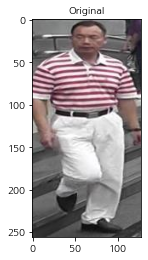

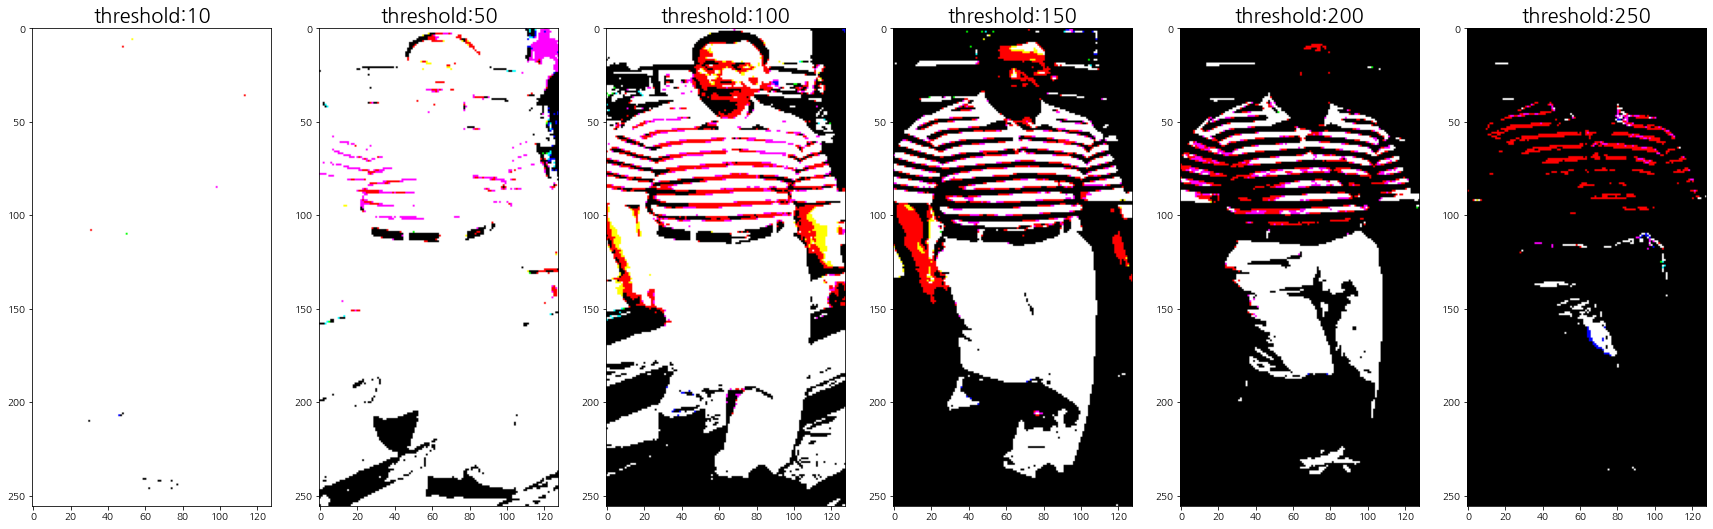

In [11]:
# cv2.THRESH_BINARY: 특정 임계값(threshold)를 초과할 경우 maxval(255)할당, 아닐 경우 0

import cv2
import matplotlib.pyplot as plt

src = cv2.cvtColor(cv2.imread('image/8th_day/bin.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(src)
plt.title('Original',fontsize=10)

threshold = [10,50,100,150,200,250]
plt.figure(figsize=(30,30))
for i in range(len(threshold)):
    plt.subplot(1, len(threshold), i+1)
    _,binary = cv2.threshold(src,threshold[i],255,cv2.THRESH_BINARY)
    plt.imshow(binary)
    plt.title(f'threshold:{threshold[i]}',fontsize=20)

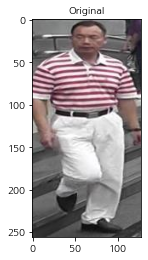

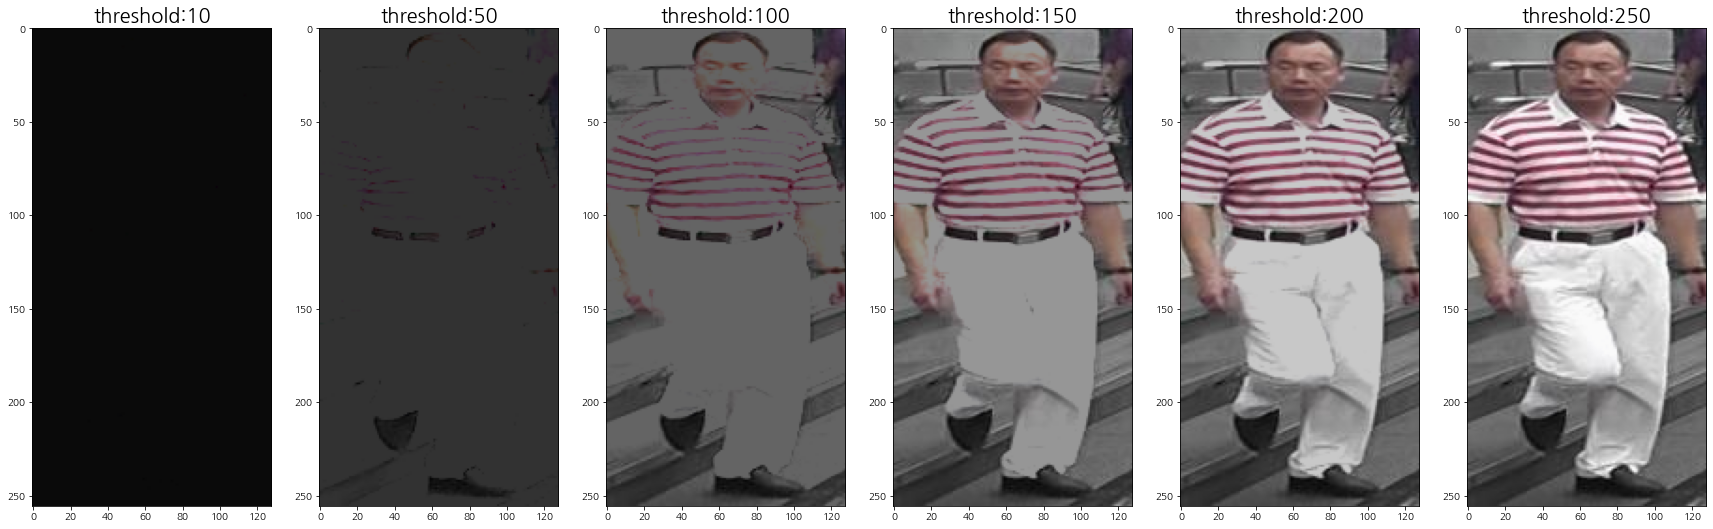

In [14]:
# cv2.THRESH_TRUNC: 임곗값(threshold)를 초과할 경우 threshold, 아닐 경우 변형 없음.

import cv2
import matplotlib.pyplot as plt

src = cv2.cvtColor(cv2.imread('image/8th_day/bin.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(src)
plt.title('Original',fontsize=10)

threshold = [10,50,100,150,200,250]
plt.figure(figsize=(30,30))
for i in range(len(threshold)):
    plt.subplot(1, len(threshold), i+1)
    _,binary = cv2.threshold(src,threshold[i],255,cv2.THRESH_TRUNC)
    plt.imshow(binary)
    plt.title(f'threshold:{threshold[i]}',fontsize=20)

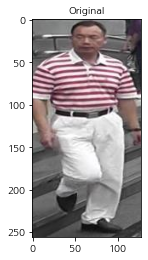

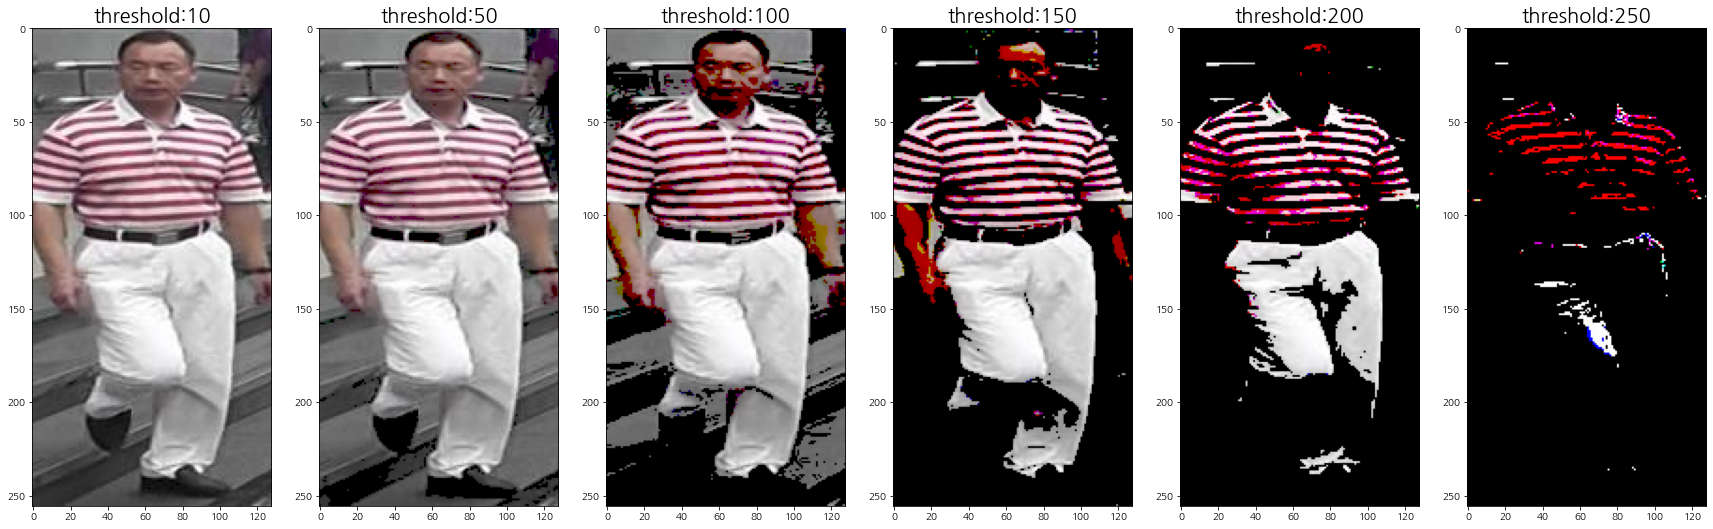

In [15]:
# cv2.THRESH_TOZERO

import cv2
import matplotlib.pyplot as plt

src = cv2.cvtColor(cv2.imread('image/8th_day/bin.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(src)
plt.title('Original',fontsize=10)

threshold = [10,50,100,150,200,250]
plt.figure(figsize=(30,30))
for i in range(len(threshold)):
    plt.subplot(1, len(threshold), i+1)
    _,binary = cv2.threshold(src,threshold[i],255,cv2.THRESH_TOZERO)
    plt.imshow(binary)
    plt.title(f'threshold:{threshold[i]}',fontsize=20)

> Q2. 이미지에 오츠 알고리즘을 적용해보세요. 2개 이상의 이미지에 오츠 알고리즘을 적용하고, 다른 점을 비교해봅시다.

error: OpenCV(4.5.1) /tmp/pip-req-build-hj027r8z/opencv/modules/imgproc/src/thresh.cpp:1557: error: (-2:Unspecified error) in function 'double cv::threshold(cv::InputArray, cv::OutputArray, double, double, int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 16 (CV_8UC3)


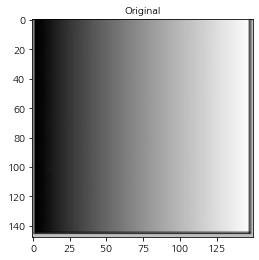

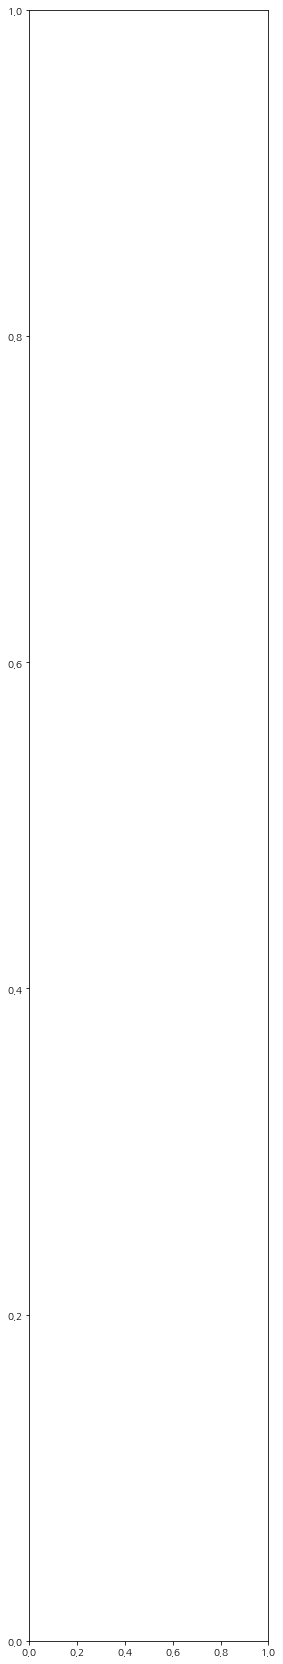

In [22]:
# cv2.THRESH_OTSU

import cv2
import matplotlib.pyplot as plt

src = cv2.cvtColor(cv2.imread('image/8th_day/gray.png'), cv2.COLOR_BGR2RGB)
plt.imshow(src)
plt.title('Original',fontsize=10)

threshold = [10,50,100,150,200,250]
plt.figure(figsize=(30,30))
for i in range(len(threshold)):
    plt.subplot(1, len(threshold), i+1)
    _,binary = cv2.threshold(src,threshold[i],255,cv2.THRESH_OTSU)
    plt.imshow(binary)
    plt.title(f'threshold:{threshold[i]}',fontsize=20)

> Q3. 아래의 코드를 참고하여, GUI 트랙바가 있는 이진화 프로그램을 만들어봅시다.

In [ ]:
## 노란책에서 제공하는 이진화 예제 코드
import sys
import numpy as np
import cv2


def on_threshold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)


filename = 'neutrophils.png'
if len(sys.argv) > 1:
    filename = sys.argv[1]

src = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

cv2.namedWindow('dst')
cv2.createTrackbar('Threshold', 'dst', 0, 255, on_threshold)
cv2.setTrackbarPos('Threshold', 'dst', 128)

cv2.waitKey(0)
cv2.destroyAllWindows()

### c. 적응형 이진화                          

- threshold() 함수는 지정한 임계값을 영상 전체 픽셀에 __동일하게 적용하여 이진화 영상을 생성한다.(전역 이진화)__         
- 그런데, 영상 특성에 따라 전역 이진화를 적용하기 어려울 때가 있다.          
- ex) 균일하지 않은 조명 환경에서 촬영된 영상에 대해 전역 이진화를 수행하면 객체와 배경이 적절히 분리되지 않는 경우가 발생한다.

![적응형 이진화](./PostingPic/8_적응형이진화.jpg)

##### 적응형 이진화 수행 방법  

- 1. 정해진 크기의 사각형 블록을 설정한다.         
- 2. 블록 영역 내부에서 임계값을 결정한다.    
- 3. 해당 블록을 이진화한다.

$T(x,y) = μ(x,y)-C$          

- 여기서 $μ(x,y)$는 주변 블록 영역의 픽셀 값 평균이며, C는 임계값 크기를 조정하는 상수이다.(사용자가 직접 선정)

> Q4. 얼룩말 책을 참고하여 하나의 이미지를 불러와, 이미지에 적응형 이진화를 적용해보세요. 같은 이미지에 2개 이상의 블록 크기를 적용하여 차이를 확인해 보세요.

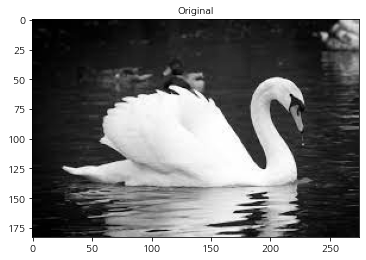

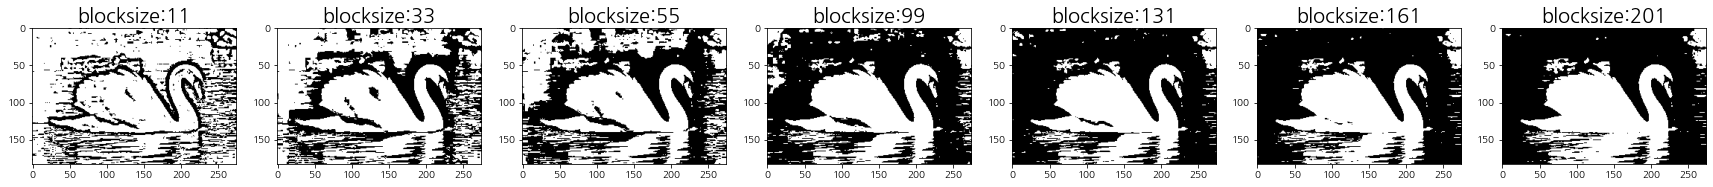

In [41]:
import cv2
import matplotlib.pyplot as plt

src = cv2.imread('image/8th_day/swan.jpeg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Original',fontsize=10)
blocksize = [11,33,55,99,131,161,201]
plt.figure(figsize=(30,30))
for i in range(len(blocksize)):
    plt.subplot(1, len(blocksize), i+1)
    binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blocksize[i], 5)
    plt.imshow(binary, cmap='gray')
    plt.title(f'blocksize:{blocksize[i]}',fontsize=20)

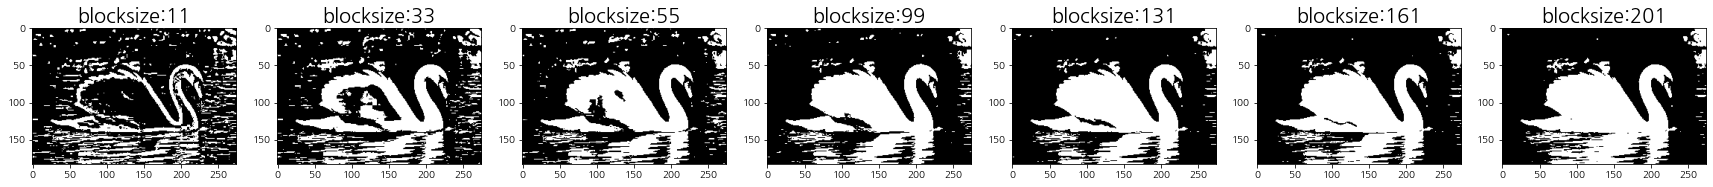

In [43]:
# 상수 C가 -5일때
plt.figure(figsize=(30,30))
for i in range(len(blocksize)):
    plt.subplot(1, len(blocksize), i+1)
    binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blocksize[i], -5)
    plt.imshow(binary, cmap='gray')
    plt.title(f'blocksize:{blocksize[i]}',fontsize=20)

> Q5. 아래의 소스코드를 참고하여, 트랙바로 블록 사이즈를 조정하는 적응형 이진화 프로그램을 만들어보세요.

In [ ]:
### 노란책에서 제공하는 트랙바로 블록 사이즈를 조정하는 적응형 이진화 프로그램 소스코드 예제
import sys
import numpy as np
import cv2


def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0: bsize = bsize - 1
    if bsize < 3: bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)


src = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)

cv2.waitKey()
cv2.destroyAllWindows()


## 모폴로지 연산        
---

- 모폴로지(morphology) : 형태론 이라고 나온다. >> 형태, 또는 모양에 관한 학문
- 모폴로지 연산은 영상 내부 객체의 형태와 구조를 분석하고 처리하는 기법이다. 
- 모폴로지 연산은 그레이스케일 영상과 이진 로 영상에 대해 모두 적용할 수 있지만, 주로 이진 영상에서 객체의 모양을 단순화하거나 잡음을 제거하는 용도로 쓴다.

### a. 이진 영상의 침식과 팽창


- 모폴로지 연산을 수행하려면 먼저 구조 요소(structuring element)를 정의해야 한다.        
- 구조 요소란, __필터링의 마스크처럼 모폴로지 연산의 동작을 결정하는 작은 크기의 행렬이다.__     

![다양한 구조 요소](./PostingPic/8_구조요소.jpg)

1. 침식 : 객체 영역의 외곽을 골고루 깎아내는 연산. __객체 영역은 축소되고, 배경은 확대된다.__        
    - 구조 요소를 영상 전체에 대해 적용하면서    
    - 구조 요소가 객체 영역 안에 완전히 들어간 경우     
    - 고정점 위치 픽셀을 255로 적용한다.

2. 팽창 : 객체 영역은 객체 외곽을 확대하는 연산. __객체 영역은 확대되고, 배경은 줄어든다.__     
    - 구조 요소를 영상 전체에 대해 이동시키면서    
    - 구조 요소와 객체 영역이 한 픽셀이라도 만나면  
    - 고정점 위치 픽셀을 255로 적용한다.

> Q6. 얼룩말 책의 소스코드를 참고하여, 하나의 이미지에 침식 연산을 수행해보세요.

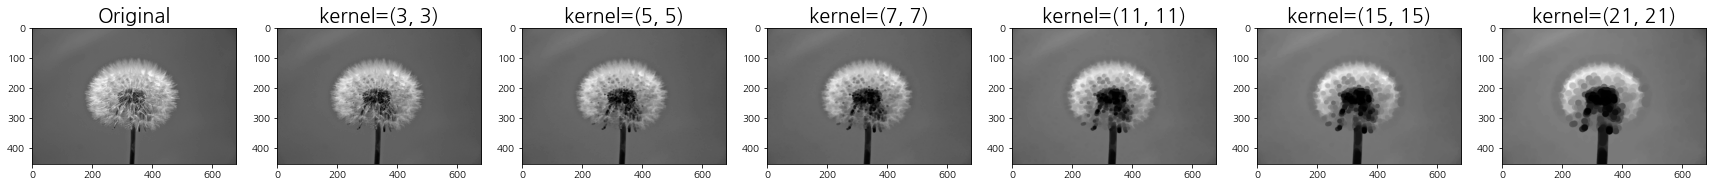

In [94]:
import cv2

src = cv2.imread('image/8th_day/min.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

kernel_list = [_,(3,3), (5,5), (7,7), (11,11), (15,15), (21,21)]

plt.figure(figsize=(30,30))
plt.subplot(1,len(kernel_list),1)
plt.imshow(gray, cmap='gray')
plt.title('Original', fontsize=20)

for i in range(1, len(kernel_list)):            
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_list[i], anchor=(-1,-1))
    dst = cv2.erode(gray, kernel, iterations=None)
    plt.subplot(1,len(kernel_list),i+1)
    plt.imshow(dst, cmap='gray')
    plt.title(f'kernel={kernel_list[i]}',fontsize=20)

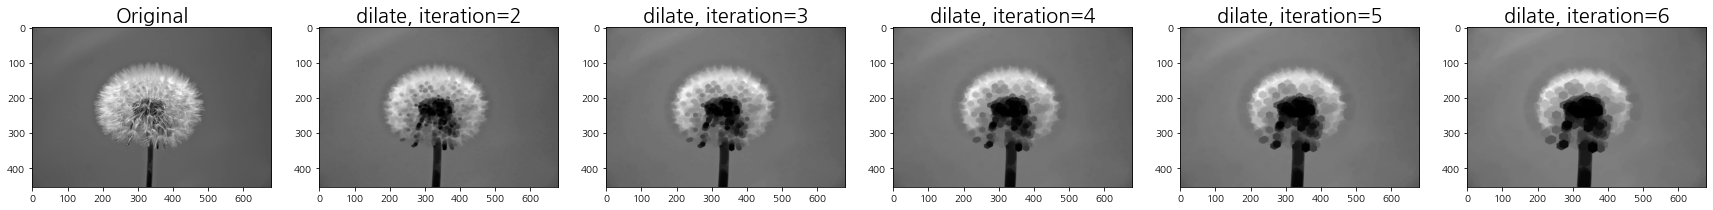

In [95]:
import cv2

src = cv2.imread('image/8th_day/min.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
it = [_,2,3,4,5,6]
plt.figure(figsize=(30,30))
plt.subplot(1,len(it),1)
plt.imshow(gray, cmap='gray')
plt.title('Original', fontsize=20)

for i in range(1, len(it)):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5), anchor=(-1,-1))
    dst = cv2.erode(gray, kernel, iterations=it[i])
    plt.subplot(1,len(it),i+1)
    plt.imshow(dst, cmap='gray')
    plt.title(f'dilate, iteration={it[i]}',fontsize=20)

> Q7. 얼룩말 책의 소스코드를 참고하여, 하나의 이미지에 팽창 연산을 수행해보세요.

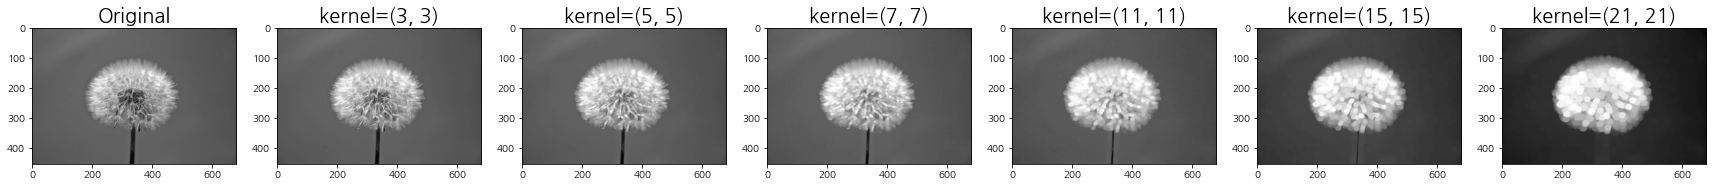

In [93]:
import cv2

src = cv2.imread('image/8th_day/min.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

kernel_list = [_,(3,3), (5,5), (7,7), (11,11), (15,15), (21,21)]

plt.figure(figsize=(30,30))
plt.subplot(1,len(kernel_list),1)
plt.imshow(gray, cmap='gray')
plt.title('Original', fontsize=20)

for i in range(1, len(kernel_list)):            
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_list[i], anchor=(-1,-1))
    dst = cv2.dilate(gray, kernel, iterations=None)
    plt.subplot(1,len(kernel_list),i+1)
    plt.imshow(dst, cmap='gray')
    plt.title(f'kernel={kernel_list[i]}',fontsize=20)

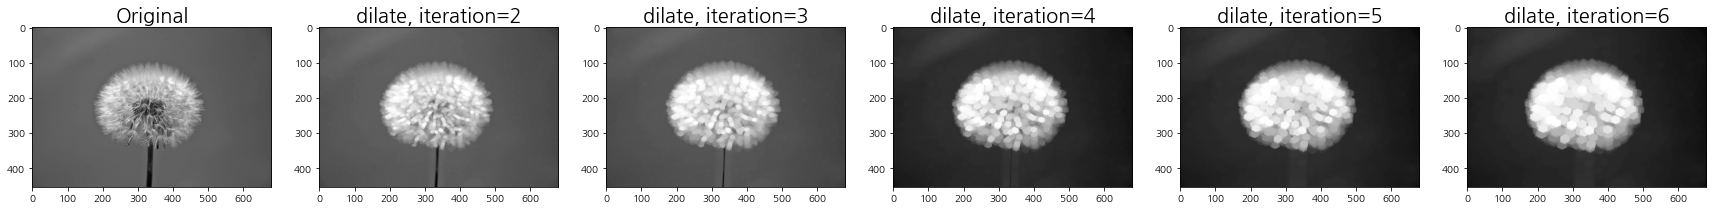

In [88]:
import cv2

src = cv2.imread('image/8th_day/min.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
it = [_,2,3,4,5,6]
plt.figure(figsize=(30,30))
plt.subplot(1,len(it),1)
plt.imshow(gray, cmap='gray')
plt.title('Original', fontsize=20)

for i in range(1, len(it)):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5), anchor=(-1,-1))
    dst = cv2.dilate(gray, kernel, iterations=it[i])
    plt.subplot(1,len(it),i+1)
    plt.imshow(dst, cmap='gray')
    plt.title(f'dilate, iteration={it[i]}',fontsize=20)

### b. 이진 영상의 열기와 닫기

- 열기 : 입력 영상에 대해 침식 연산을 수행한 후, 다시 팽창 연산을 수행하는 것       
- 닫기 : 입력 영상에 대해 팽창 연산을 수행한 후, 다시 침식 연산을 수행하는 것    

- __열기/닫기 연산은 각각 침식과 팽창을 한 번씩 수행하기 때문에 객체 영역의 크기가 크게 변화하지 않는다.__    
- 단, 적용 순서(열기/닫기)에 따라 서로 다른 효과가 발생한다.      


1. 열기 연산의 경우 침식 연산을 먼저 수행하기 때문에 작은 크기의 객체가 효과적으로 제거된다.    
2. 닫기 연산의 경우 팽창 연산을 먼저 수행하기 때문에 내부가 메워진다.

![여닫기결과](./PostingPic/8_여닫기결과.jpg)

(a) : 열기 연산을 수행한 결과. 가장자리의 작은 객체나, 튀어나온 부분들이 사라졌다.      
(b) : 닫기 연산을 수행한 결과. 중간의 텅 빈 부분이 메꿔졌다.

> Q8. 동일한 이미지에 대해 열기와 닫기 연산을 각각 수행하고, 달라진 부분을 알려주세요.

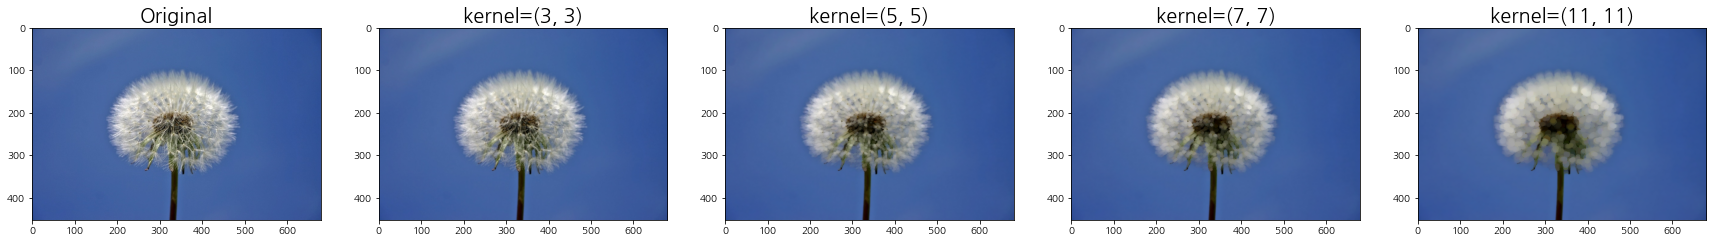

In [111]:
# 열림 연산1
import cv2
import numpy as np

src = cv2.cvtColor(cv2.imread('image/8th_day/min.jpg'), cv2.COLOR_BGR2RGB)

kernel_list = [_,(3,3), (5,5), (7,7), (11,11)]

plt.figure(figsize=(30,30))
plt.subplot(1,len(kernel_list),1)
plt.imshow(src)
plt.title('Original', fontsize=20)

for i in range(1, len(kernel_list)):            
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_list[i], anchor=(-1,-1))
    # 열림 연산 표현: dst = dilate(erode(src))
    dst = cv2.dilate(cv2.erode(src, kernel),kernel)
    plt.subplot(1,len(kernel_list),i+1)
    plt.imshow(dst)
    plt.title(f'kernel={kernel_list[i]}',fontsize=20)

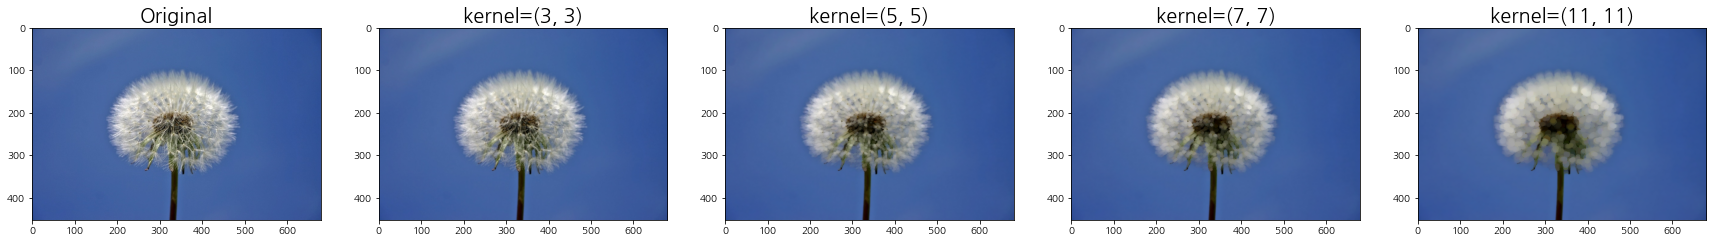

In [112]:
# 열림 연산2
import cv2
import numpy as np

src = cv2.cvtColor(cv2.imread('image/8th_day/min.jpg'), cv2.COLOR_BGR2RGB)

kernel_list = [_,(3,3), (5,5), (7,7), (11,11)]

plt.figure(figsize=(30,30))
plt.subplot(1,len(kernel_list),1)
plt.imshow(src)
plt.title('Original', fontsize=20)

for i in range(1, len(kernel_list)):            
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_list[i], anchor=(-1,-1))
    # 열림 연산 표현: op = cv2.MORPH_OPEN
    dst = cv2.morphologyEx(src, cv2.MORPH_OPEN, kernel)
    plt.subplot(1,len(kernel_list),i+1)
    plt.imshow(dst)
    plt.title(f'kernel={kernel_list[i]}',fontsize=20)

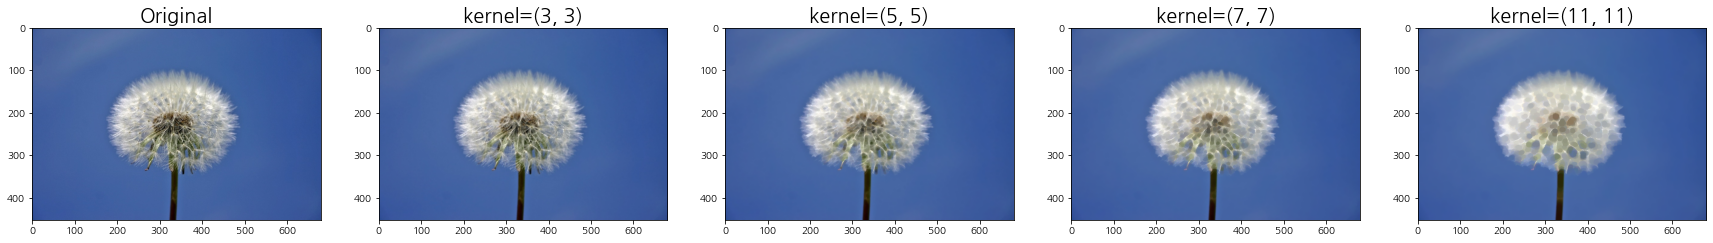

In [113]:
# 닫힘 연산
import cv2
import numpy as np

src = cv2.cvtColor(cv2.imread('image/8th_day/min.jpg'), cv2.COLOR_BGR2RGB)

kernel_list = [_,(3,3), (5,5), (7,7), (11,11)]

plt.figure(figsize=(30,30))
plt.subplot(1,len(kernel_list),1)
plt.imshow(src)
plt.title('Original', fontsize=20)

for i in range(1, len(kernel_list)):            
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_list[i], anchor=(-1,-1))
    
    dst = cv2.morphologyEx(src, cv2.MORPH_CLOSE, kernel)
    plt.subplot(1,len(kernel_list),i+1)
    plt.imshow(dst)
    plt.title(f'kernel={kernel_list[i]}',fontsize=20)

> Q9. 오늘 배운 이진화, 모폴로지 연산이 실무에 어떻게 적용될 수 있을 지 몇 개의 사례를 찾아봅시다.

## 오늘 실습은 여기까지입니다. 해커톤 3로 바쁜 와중에 정말 고생하셨습니다. 토요일에 만나요 :)